In [99]:
options(repr.plot.width=5, repr.plot.height=5)

# Luria-Delbruck




## Testing the adaptive hypothesis

According to the adaptive hypothesis, mutations only appear after exposure to the stress (antibiotics). This leads to a Poisson distribution of numbers of resistant colonies. We can test this by constructing a null distribution under this hypothesis and testing one key property of Poisson distributions: 

$$\sigma^2 = \mu \quad\text{ or }\quad \frac{\sigma^2}{\mu}=1$$

### constructing a bootstrapped null distribution

the strategy is to: 
* draw a large number of samples of the size of your replicates
* calculate the mean and variance of each sample
* calculate the 95% p-value cutoffs on this distribution

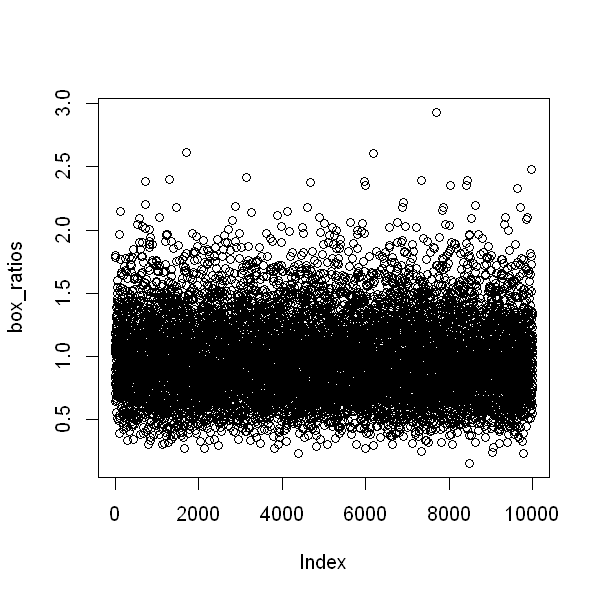

In [216]:
m=10  # the parameter of the Poisson -> it does not matter for this
replicate_size=20 # how many plates you had

box_ratios <- vector()

for(i in 1:10000)
{
    replicate = rpois(n=replicate_size,lambda=m)
    mean_adap = mean(replicate)
    var_adap  <- var(replicate)
    ratio = var_adap/mean_adap
    box_ratios <- c(box_ratios,ratio)
}

plot(box_ratios)



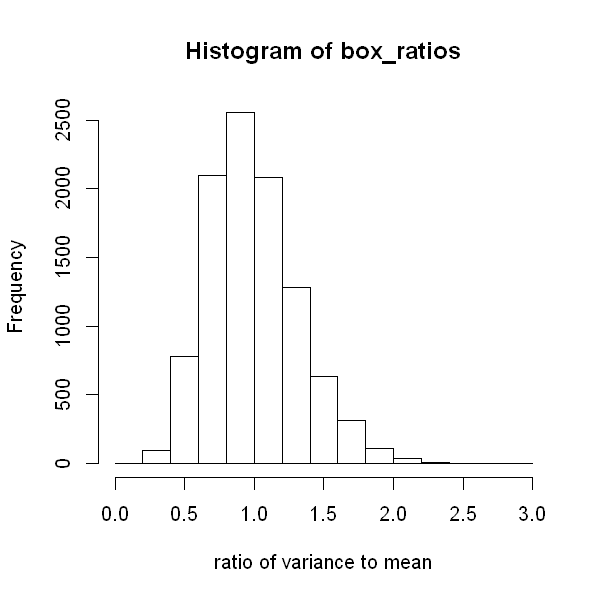

In [217]:
hist(box_ratios,xlab = "ratio of variance to mean")

In [218]:
quantile(box_ratios,.95,na.rm=TRUE)

95% 
1.590058

In [188]:
m = 1
replicate_size = 10

box_pois = matrix(,0,2)

for (i in 1:10000){
    replicate = rpois(n=replicate_size,lambda = m)
    box_pois = rbind(box_pois,c(mean(replicate),var(replicate)))
}

#calculating the ratio
box_pois =  cbind(box_pois,apply(box_pois, 1,function(r) r[2]/r[1] ))
# naming our columns
colnames(box_pois) = c("mean","variance","ratio")


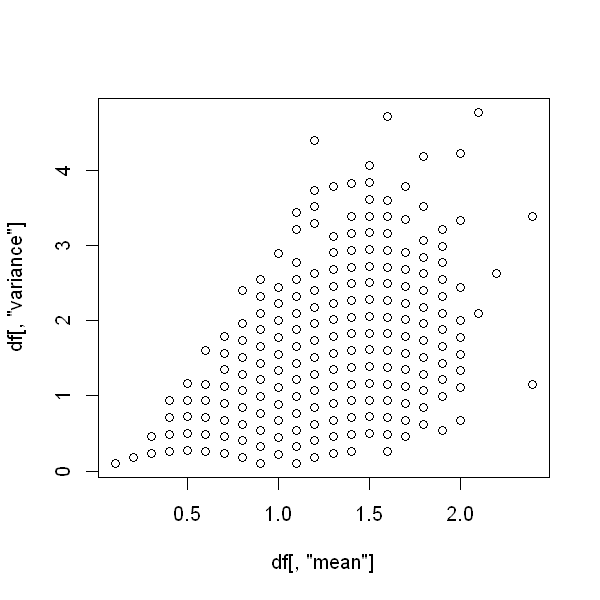

In [142]:
 plot(df[,"mean"],df[,"variance"])

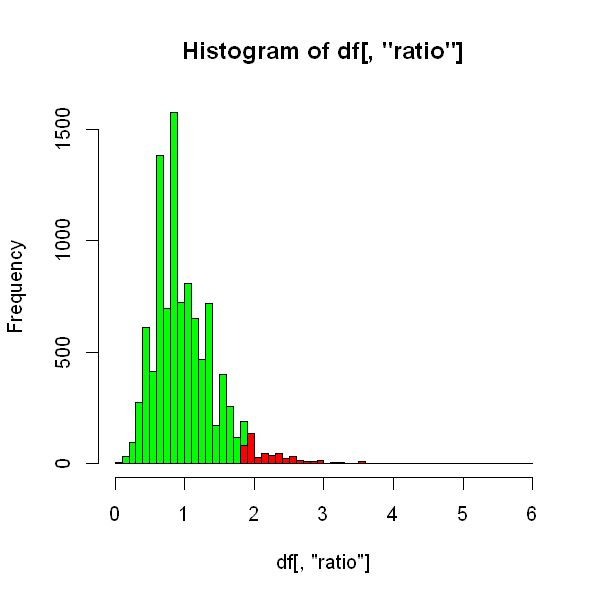

In [153]:
ax = seq(0,6,.1)
hist1 = hist(df[,'ratio'],breaks=ax,plot=FALSE)
hist2 = hist(df[df[,'ratio']>quantile(df[,'ratio'],.95,,na.rm=TRUE),'ratio'],breaks=ax,plot=FALSE)

plot(hist1,col='green')
plot(hist2,col='red',add=TRUE)
# quantile(df[,'ratio'],c(.025,.975))


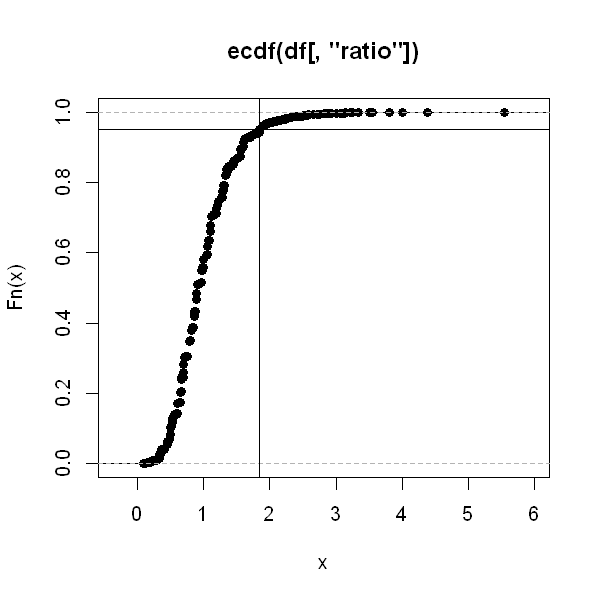

In [161]:
plot(ecdf(df[,'ratio']))
abline(v=quantile(df[,'ratio'],.95,na.rm=TRUE))
abline(h=.95)

In [203]:
quantile(box_ratios,.95,na.rm=TRUE)

95% 
1.839506

In [159]:
quantile(df[,'ratio'],.95,na.rm=TRUE)

95% 
1.839506

# Estimating the mutation rate

# POIS  rpois

One can estimate the mutation rate from the probability that no resistance occurs:

$$ \frac{m^0}{0!}e^{-m} = P_0 $$

where $m=\mu\,N$

**Question:** why can't we use other classes (like the probability that there are 3 or 4 mutations?)

the estimator is then $\hat{m} = -\text{ln}P_0 $

(It has been shown that) This is a biased estimator, but it is simple and we will use it. A better one is based on the *median*...

Let's estimate the expected 95% intervals for the mutation rate, given your replicate size (10).

* Assume that the real $P_0$ is the one you observed.
* Sample from a binomial with probability of success (no mutations) $p=P_0$ and $n=10$ 
* calculate $m$ for these values and calculate the 95% intervals.

In [186]:
P0 = .2
n_reps = 10

ps = rbinom(n=100000,size=n_reps,prob=P0)/n_reps

summary(ps)

quantile(ps,c(.025,.975))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1000  0.2000  0.1997  0.3000  0.9000 

2.5% 97.5% 
  0.0   0.5

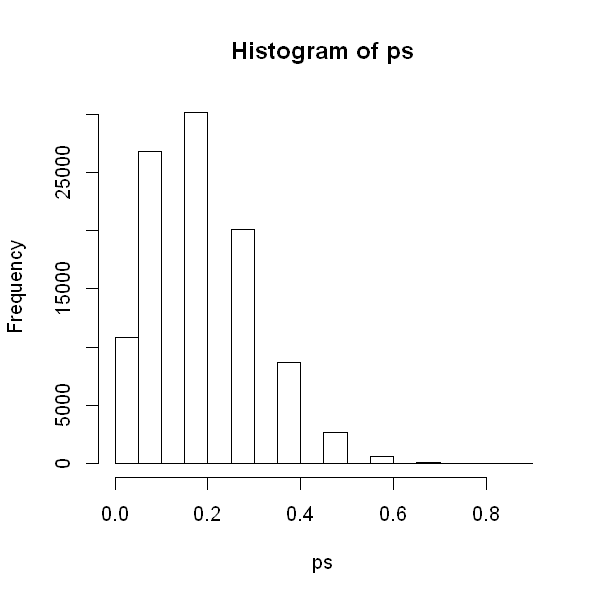

In [220]:
hist(ps)

[1] 1.623193

[1] Inf

2.5%     97.5% 
0.6931472 2.3025851

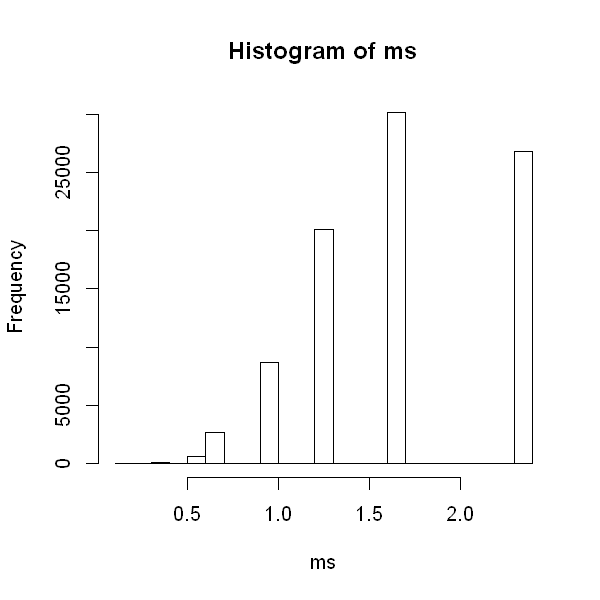

In [225]:

ms = -log(ps)

mean(ms[is.finite(ms)])
mean(ms,na.rm=TRUE)
quantile(ms[is.finite(ms)],c(.025,.975))

hist(ms)